In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "PCB.dt"

df = pd.read_csv(path, sep=r"\s+", header=None, names=["age", "PCB_level"])
X = df[["age"]].values
y = df["PCB_level"].values


In [ ]:
#Linear Regression function

def linear_regression(X, y):
    X_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    theta_optimized = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)
    return theta_optimized

linear = linear_regression(X, y)
b_lin, a_lin = linear[0], linear[1]
y_pred_lin = a_lin * X.reshape(-1) + b_lin
MSE_lin = np.mean((y - y_pred_lin) ** 2)
print("Linear MSE =", MSE_lin)

print(linear)

Linear MSE = 24.80106431657058
[-1.45194395  1.55777052]


In [ ]:
#Non-linear

y_log = np.log(y)

theta_raw = linear_regression(X.reshape(-1, 1), y_log)
b, a = theta_raw[0], theta_raw[1]

def h(x_in):
    x_in = np.asarray(x_in, dtype=float).reshape(-1)
    return np.exp(a * x_in + b)

y_pred = h(X)
MSE = np.mean((y - y_pred) ** 2)

print("a =", a, "b =", b)
print("MSE =", MSE)

a = 0.2591282395640714 b = 0.031472469714475926
MSE = 34.83556116722034


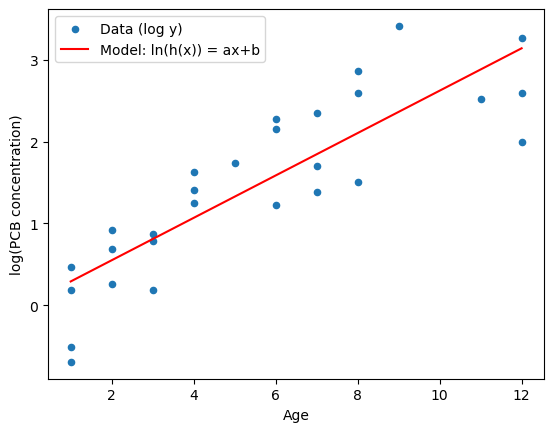

In [ ]:
# Plotting

x_line = np.linspace(X.min(), X.max(), 100)
y_model_log = a * x_line + b

plt.scatter(X, y_log, label="Data (log y)", s=20)
plt.plot(x_line, y_model_log, color="red", label="Model: ln(h(x)) = ax+b")
plt.xlabel("Age")
plt.ylabel("log(PCB concentration)")
plt.legend()
plt.show()


In [ ]:
#calculating R^2

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

explanation_degree = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
print("R^2 =", explanation_degree)

R^2 = 0.3570135731609867


Non-linear MSE = 100.78096247836443
R^2 (log) = 0.7313915439623445


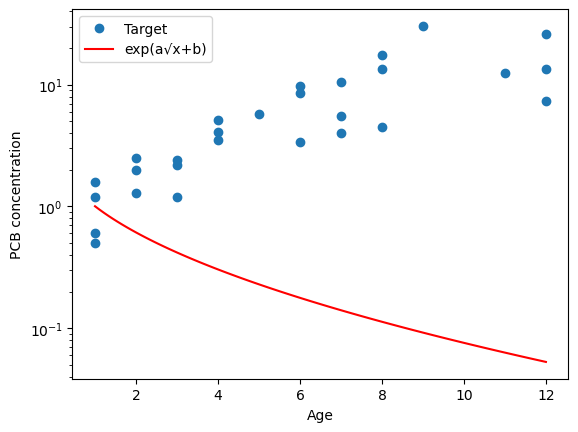

In [ ]:
#building a non-linear model

import math

X_sqrt = np.sqrt(X).reshape(-1, 1)

theta_sqrt_log = linear_regression(X_sqrt, y_log)

a, b = theta_sqrt_log[0], theta_sqrt_log[1]

y_pred_non_linear = np.exp(a * np.sqrt(X) + b)

MSE_non_lin = np.mean((y - y_pred_non_linear) ** 2)

y_model = np.exp(a * np.sqrt(x_line) + b)

R2_log = r2_score(y_log, np.log(y_pred))

print("Non-linear MSE =", MSE_non_lin)
print("R^2 (log) =", R2_log)

plt.semilogy(X, y, "o", label="Target")
plt.plot(x_line, y_model, color="red", label="exp(a√x+b)")
plt.xlabel("Age")
plt.ylabel("PCB concentration")
plt.legend()
plt.show()

